# Universidade Federal do Rio Grande do Norte
## Programa de Pós-graduação em Engenharia Elétrica e de Computação
### Course: Tópicos Especiais C - Data Science Foundation
### Professor: Ivanovitch Silva
### Students: 

* Aguinaldo Bezerra Batista Júnior
* Pedro Klisley Ferreira da Silva
* Ycaro Ravel Dantas

#### Activity: Project 4
#### Subject: IES employees gender analysis
#### Objectives: Analyze gender in IES employees from webscrapped data of Portal da Transparência 
#### Base dataset: number_of_employees.csv

### 0 Loading Libraries and base dataset

In [240]:
# Loading needed libraries
import pandas as pd
import requests as requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

This activity starts with loading a base dataset obtained in professor's guiding notebook. This dataset was built on webscrapped data from [Portal da Transparência](http://www.portaldatransparencia.gov.br/).

In [241]:
# Loading data retrieved in the professor's guiding notebook
ies_df = pd.read_csv('number_of_employees.csv')
ies_df.sort_values('Code').head()

,Unnamed: 0,Code,IES_name,Number_employees
62,62,26201,COLEGIO PEDRO II,2345
32,32,26201,COLEGIO PEDRO II,2345
2,2,26201,COLEGIO PEDRO II,2345
77,77,26201,COLEGIO PEDRO II,2345
107,107,26201,COLEGIO PEDRO II,2345


In this initial webscrapping process, data was obtained from the [Ministry of Education](http://www.portaldatransparencia.gov.br/servidores//OrgaoExercicio-ListaOrgaos.asp?CodOS=15000) page in [Portal da Transparência](http://www.portaldatransparencia.gov.br/). In this activity we have to go deeper in the webscrapping proccess and obtain more data from several pages in that website.

### 1 Retrieving public employee data
The webscrapping process starts with the analysis of [Portal da Transparência](http://www.portaldatransparencia.gov.br/) webpage structure:
* Ministry of Education
    - IES employees pages

Each IES may have several pages listing employees, so we must access all of them to get the desired data

In [242]:
# Base URL to access the institutions's list of employees
base_url = 'http://www.portaltransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOrg={}'

In [ ]:
ies_names = []
# Base page lookup
#for ies in ies_df.Code:
for ies in ies_df.Code.sort_values().tail(10):
       
    url = base_url.format(ies).replace(" ", "")
    
    # Retrieving content for the main page for the institution
    response = requests.get(url)
    
    # Pause the loop
    sleep(randint(5,10))
    
    # Parsing content
    ies_html = BeautifulSoup(response.text, 'html.parser')
    
    # Discovering the number of pages per institution
    npages = 1
    #npages = ies_html.find('p', class_='paginaAtual').text.rsplit('/',1)[1]
    
    #ies_name = ies_html.find_all('td',class_='colunaValor')[1].text.strip()    
    
    # Gathering data from IES employee pages
    for page in range(1,int(npages)+1):
        
        page_url = url+'&Pagina={}'.format(page).replace(" ", "")
        
        resp = requests.get(page_url)
        
         # Pause the loop
        sleep(randint(5,10))
        
        # Retrieving content for the page
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        page_table_rows = page_html.find_all('td')
            
        names = []
        # Getting names in each page
        for row in page_table_rows:
            name = row.find('a')
            
            if name is not None:
                name = name.text.strip()
                names.append(name)
                ies_names.append(ies_name)
                print(name)
                print(ies)
                
    
        #break
    
    
    #break
    


Now, with scrapped data in hands, a new dataframe can be built. The absent gender information problem will be addressed in next section

In [166]:
# Building a new dataset based on the lists built from webscrapying
columns = ['Name','IES','Guessed_Gender']
ies_employees_df = pd.DataFrame(columns=columns)
ies_employees_df.Name = names
ies_employees_df.IES = ies_names
ies_employees_df.Guessed_Sex = None

In [169]:
ies_employees_df

,Name,IES,Guessed_Gender
0,ABELARDO BENTO ARAUJO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
1,ABNER BRAGANCA GOUVEA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
2,ACCACIO FERREIRA DOS SANTOS NETO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
3,ADALBERTO JOSE DE LIMA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
4,ADALBERTO PEREIRA DA SILVA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
5,ADALBERTO TEIXEIRA DE ANDRADE ROCHA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
6,ADALTON MARTINS GOMES,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
7,ADELSON DE PAULA SILVA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
8,ADELSON FERNANDES MOREIRA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN
9,ADERCI DE FREITAS FILHO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,NaN


### 2 Guessing Genders
Generally, person's first name is closed related to gender. So, it may be possible to guess gender from a person's firts name using some libraries and APIs.

Our first approach is to use the [GenderBR](http://fmeireles.com/blog/rstats/genderbr-predizer-sexo) package availabe in R (CRAN) to try to predict gender from a person's first name. We have chosen this package because it bases its prediction on IBGE official data. So, clearly it is an accurate and offline approach to guess gender for brazilian names.

In [53]:
# We are able to run R commands in ipython using this python library
import rpy2.robjects as robjects
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
%%R 
# Need to load this R library for gender guessing
suppressMessages(library(genderBR))

In [22]:
genders = []
# Using robjects to run R procedures
for name in ies_employees_df.Name:
        name = name.split()[0]
        gender = robjects.r.get_gender(name, threshold = 0.95)
        gender = gender.r_repr()
        gender = gender.strip('\"')
        if gender.startswith('NA'):
            gender = None
        genders.append(gender)

In [23]:
ies_employees_df.Guessed_Gender = genders

In [24]:
ies_employees_df

,Name,IES,Guessed_Gender
0,ABELARDO BENTO ARAUJO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
1,ABNER BRAGANCA GOUVEA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
2,ACCACIO FERREIRA DOS SANTOS NETO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
3,ADALBERTO JOSE DE LIMA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
4,ADALBERTO PEREIRA DA SILVA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
5,ADALBERTO TEIXEIRA DE ANDRADE ROCHA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
6,ADALTON MARTINS GOMES,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
7,ADELSON DE PAULA SILVA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
8,ADELSON FERNANDES MOREIRA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
9,ADERCI DE FREITAS FILHO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,None


R's [GenderBR](http://fmeireles.com/blog/rstats/genderbr-predizer-sexo) did a very good job in gender guessing, however it failed to predict gender for some names. So, a next plausible approach is to use some online API. We have found that the free [Genderize.io](https://genderize.io) dabase contains thousands of distinct names across several countries and languages. This API is keyless but limited to generous 1000 names/day.

In [25]:
# No API key required for genderize.io
def genderize_io(genderless_name):
    genderless_name = genderless_name.split()[0]
    api_url='https://api.genderize.io/?name={}'.format(genderless_name).replace(" ", "")
    gender = requests.get(api_url,timeout=10).json().get('gender')
    if(gender):
        return gender.capitalize()
    else:
        return None

In [26]:
for index,row in ies_employees_df.iterrows():
    if row[2] is None:
        gen = genderize_io(row[1])
        if(gen):
            ies_employees_df.Guessed_Gender.loc[index] = gen
        
        

In [27]:
ies_employees_df

,Name,IES,Guessed_Gender
0,ABELARDO BENTO ARAUJO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
1,ABNER BRAGANCA GOUVEA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
2,ACCACIO FERREIRA DOS SANTOS NETO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
3,ADALBERTO JOSE DE LIMA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
4,ADALBERTO PEREIRA DA SILVA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
5,ADALBERTO TEIXEIRA DE ANDRADE ROCHA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
6,ADALTON MARTINS GOMES,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
7,ADELSON DE PAULA SILVA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
8,ADELSON FERNANDES MOREIRA,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male
9,ADERCI DE FREITAS FILHO,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,Male


### 3 Gender Analysis in IES

In [39]:
ies_employees_df.Guessed_Gender.value_counts()

Male    15
Name: Guessed_Gender, dtype: int64

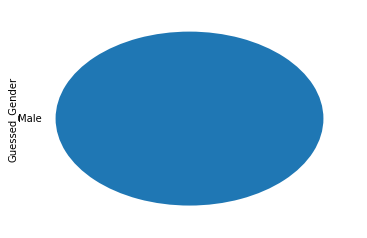

In [38]:
%matplotlib inline
ies_employees_df.Guessed_Gender.value_counts().plot(kind='pie')